In [1]:
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
from scipy import *
import pandas as pd   
from pylab import *
import scaleogram as scg
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.ensemble import RandomForestClassifier


In [2]:
filename = 'acc_00011.csv'
df = pd.read_csv(filename, header=None)

In [3]:
 #здесь заменить на df[0], если данные акселерометра в первом столбце таблицы
signal = df[4].values               
(cA1,  cD1)  =  pywt .dwt (signal,  'db2', 'smooth')
#r_signal = pywt.idwt (cA1,  cD1,  'db2', 'smooth')
signal

array([0.388, 0.354, 0.124, ..., 0.764, 0.874, 1.225])

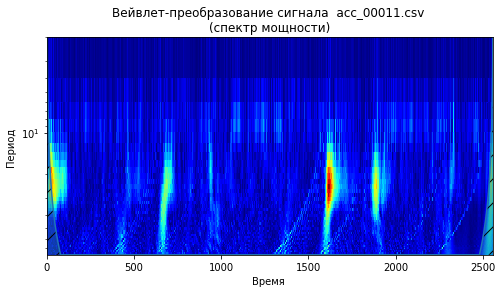

In [4]:
wavelet = 'cmor1-0.5' 
ax = scg.cws(signal, scales=arange(1, 40), wavelet=wavelet, figsize=(8, 4), cmap="jet", cbar=None, ylabel='Период ',yscale="log", xlabel="Время ",
title='Вейвлет-преобразование сигнала  %s \n(спектр мощности)'%filename)
show()

In [5]:
#fig, ax =subplots(figsize=(8,4))
#ax.plot(signal, 'b',label='Оригинальный сигнал')
#ax.plot(r_signal, 'r', label=' Восстановленный сигнал', linestyle='--')
#ax.legend(loc='upper left')
#ax.set_ylabel('Амплитуда сигнала', fontsize=12)
#ax.set_xlabel('Время', fontsize=12)
#ax.set_title(' Деконструкция сигнала (функция pywt.dwt()) \n Восстановление сигнала (функции  pywt.idwt()) ')
#show()

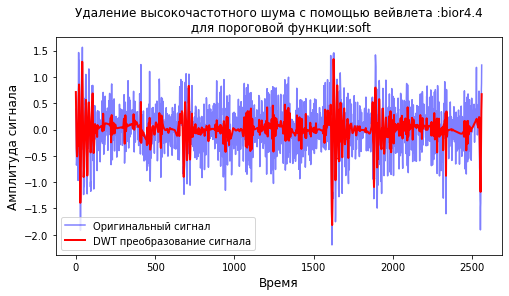

In [6]:
v='bior4.4'
thres=['soft']
for w in thres:
    def lowpassfilter(signal, thresh, wavelet=v):
        thresh = thresh*nanmax(signal)
        coeff = pywt.wavedec(signal, wavelet, level=8,mode="per" )
        coeff[1:] = (pywt.threshold(i, value=thresh, mode=w ) for i in coeff[1:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
        return reconstructed_signal     
    fig, ax = plt.subplots(figsize=(8,4))  
    ax.plot(signal, color="b", alpha=0.5, label='Оригинальный сигнал')
    rec = lowpassfilter(signal, 0.4)
    ax.plot(rec, 'r', label='DWT преобразование сигнала', linewidth=2)
    ax.legend()
    ax.set_title('Удаление высокочастотного шума с помощью вейвлета :%s\n для пороговой функции:%s'%(v,w), fontsize=12)
    ax.set_ylabel('Амплитуда сигнала', fontsize=12)
    ax.set_xlabel('Время', fontsize=12)     
show()

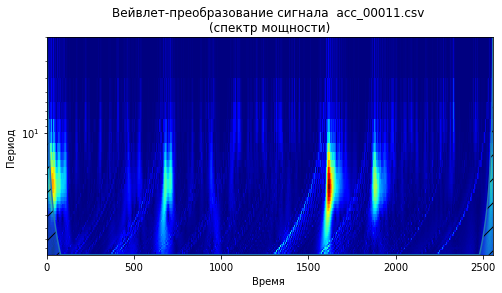

In [7]:
ax = scg.cws(rec, scales=arange(1, 40), wavelet=wavelet, figsize=(8, 4), cmap="jet", cbar=None, ylabel='Период ',yscale="log", xlabel="Время ",
title='Вейвлет-преобразование сигнала  %s \n(спектр мощности)'%filename)
show()

In [8]:
rec

array([0.71194682, 0.54084704, 0.28704508, ..., 0.36387226, 0.53053228,
       0.67129545])

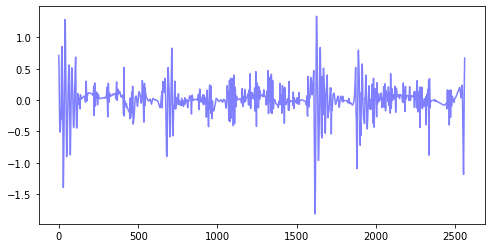

In [9]:
fig, ax = plt.subplots(figsize=(8,4))  
ax.plot(rec, color="b", alpha=0.5, label='Обработанный сигнал')
show()

In [10]:
recx= rec.reshape((-1, 1))


km = KMeans(n_clusters=3, random_state=0)
y  = km.fit(recx)

In [11]:
y.cluster_centers_

array([[ 5.43072108e-04],
       [-6.01312892e-01],
       [ 3.76721203e-01]])

In [13]:
stats.describe(rec)

DescribeResult(nobs=2560, minmax=(-1.8146447907664907, 1.3379117784267889), mean=0.005452734375000007, variance=0.054060081736181494, skewness=-1.0537785547173253, kurtosis=11.46116920673459)

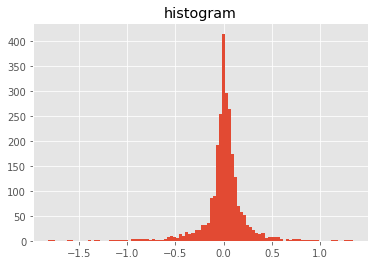

In [14]:
# выбор темы картинок на Ваш вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline
plt.hist(rec,bins=100) 
plt.title("histogram") 
plt.show()

In [1]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)


NameError: name 'RandomForestClassifier' is not defined